# Introduction

Is there any relation between the suicide, as a social phenomenona, and the economic, criminal and gender diversity of a society?

Along this work, we will try to answer this question for the context of an specific country which provides us with access a to series of datasets that are useful for this goal.

In the Argentina's government [public official datasets site](https://datos.gob.ar/dataset) we can find for our interest the following ones:

\underline{Principal Sources}

*   [Hechos y víctimas de suicidios en la República Argentina. Total nacional (panel)](https://datos.gob.ar/dataset/seguridad-suicidios-sistema-alerta-temprana-estadisticas-criminales-republica-argentina/archivo/seguridad_12.2): which recopiles the registered suicides in all the country since the year 2017 by the Sistema de Alerta Temprana del Sistema Nacional de Información Criminal.
*   [Estadísticas criminales en la República Argentina por provincias](https://datos.gob.ar/dataset/seguridad-snic---provincial-estadisticas-criminales-republica-argentina-por-provincias/archivo/seguridad_2.2): that give us a bunch of statistcs measures taken for each province of the country since the year 2000.
*   [Salario promedio por departamento/partido y clae2, total empresas](https://datos.gob.ar/dataset/produccion-salarios-por-departamentopartido-sector-actividad/archivo/produccion_76593966-9526-4a9d-b56c-87c8a4a20dd8): the mean wage for each department of the country and sector based on the AFIP's CLAE2 standard.

\underline{Secondary Sources}

*   [Diccionario de departamentos](https://datos.gob.ar/dataset/produccion-salarios-por-departamentopartido-sector-actividad/archivo/produccion_e8cb322b-6934-46b9-ae4e-713470287240): which provides the INDEC's standard names and ids for the departments of the country.
*   [Diccionario de claes](https://datos.gob.ar/dataset/produccion-salarios-por-departamentopartido-sector-actividad/archivo/produccion_8c7e4f21-750e-4298-93d1-55fe776ed6d4): that contains AFIP's categories to classify the economic activities of Argentina.

Which were mapped in `data_cleaning.ipynb` to a number of tables that follow the ERD:

![ERD](https://drive.google.com/uc?id=1islpEu6Dd5pdxKj9CztsnAgzJIQvN42F)

Givin us datasets for:

- Provinces
- Departments
- Crimes
- Suicides
- Mean Income
- CLAE

that are consistent between each other, preserve almost all the original data rows and drops out the variables that we not consider useful appropiate for this work.

With thst present, we can start.


# Data Analysis

## Used libraries

In [1]:
!pip install inline_sql

In [2]:
# in case of using colab
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from inline_sql import sql

## Loading the datasets

In [4]:
working_dir = "/content/MyDrive/MyDrive/Proyectos/Suicidios_Análisis/"

In [5]:
provinces = pd.read_csv(working_dir+"Clean_Data/provincias.csv", sep=",")

In [6]:
departments = pd.read_csv(working_dir+"Clean_Data/departamentos.csv", sep=",")

In [7]:
crimes = pd.read_csv(working_dir+"Clean_Data/crimenes.csv", sep=",")

In [8]:
suicides = pd.read_csv(working_dir+"Clean_Data/suicidios.csv", sep=",")

In [9]:
mean_income = pd.read_csv(working_dir+"Clean_Data/ingresos_promedio.csv", sep=",")

In [10]:
clae2 = pd.read_csv(working_dir+"Clean_Data/clae2.csv", sep=",")

## Suicide Isolated Analysis

Let's start getting a few insights only looking at the `suicides` dataset by itself: the distribution of our data, its evolution along the time and by gender.

In [11]:
suicides.head()

,id_hecho,id_departamento_indec,fecha,hora,lugar,modalidad,origen_registro,suicida_sexo,suicida_rango_edad,suicida_identidad_genero
0,8569,78021,01-01-2017,19:00:00,Vía pública,Ahorcamiento,Denuncia particular,Masculino,15-19,Sin determinar
1,8705,58035,31-01-2017,17:30:00,Otro Lugar ( Especificar ),Arma de fuego,Intervención policial,Masculino,20-24,Sin determinar
2,8706,58035,31-01-2017,22:40:00,Domicilio particular,Ahorcamiento,Intervención policial,Masculino,20-24,Sin determinar
3,8707,58035,29-01-2017,20:30:00,Domicilio particular,Ahorcamiento,Intervención policial,Masculino,20-24,Sin determinar
4,8708,58049,02-01-2017,14:25:00,Domicilio particular,Ahorcamiento,Intervención policial,Masculino,45-49,Sin determinar


In [12]:
suicides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21426 entries, 0 to 21425
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id_hecho                  21426 non-null  int64 
 1   id_departamento_indec     21426 non-null  int64 
 2   fecha                     21426 non-null  object
 3   hora                      21426 non-null  object
 4   lugar                     21426 non-null  object
 5   modalidad                 21426 non-null  object
 6   origen_registro           21426 non-null  object
 7   suicida_sexo              21426 non-null  object
 8   suicida_rango_edad        21426 non-null  object
 9   suicida_identidad_genero  21426 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.6+ MB


Let´s parse `fecha` to a pandas date. It follows the format `dd-mm-yyyy`

In [13]:
suicides["fecha"] = pd.to_datetime(suicides["fecha"], format="%d-%m-%Y")

Now we should parse the `hora` variable to a pandas hour datatype.

In [14]:
suicides["hora"] = pd.to_datetime(suicides["hora"], format="%H:%M:%S").dt.time

In [15]:
suicides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21426 entries, 0 to 21425
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_hecho                  21426 non-null  int64         
 1   id_departamento_indec     21426 non-null  int64         
 2   fecha                     21426 non-null  datetime64[ns]
 3   hora                      21426 non-null  object        
 4   lugar                     21426 non-null  object        
 5   modalidad                 21426 non-null  object        
 6   origen_registro           21426 non-null  object        
 7   suicida_sexo              21426 non-null  object        
 8   suicida_rango_edad        21426 non-null  object        
 9   suicida_identidad_genero  21426 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 1.6+ MB


In [16]:
print(suicides["hora"].dtype)

object


Now, let´s see the evolution of this phenomena over the time.

In [17]:
len(suicides["fecha"].unique())

2191

There are some dates that are repeated, that is something that can happen. For our plot, we will use only the year and month, to get a more macro view of the situation.

In [18]:
suicides_grouped = suicides.copy()

In [19]:
suicides_grouped['year'] = pd.DatetimeIndex(suicides_grouped['fecha']).year
suicides_grouped['month'] = pd.DatetimeIndex(suicides_grouped['fecha']).month

In [20]:
suicides_grouped.drop(columns=["fecha"], inplace=True)

In [21]:
suicides_grouped

,id_hecho,id_departamento_indec,hora,lugar,modalidad,origen_registro,suicida_sexo,suicida_rango_edad,suicida_identidad_genero,year,month
0,8569,78021,19:00:00,Vía pública,Ahorcamiento,Denuncia particular,Masculino,15-19,Sin determinar,2017,1
1,8705,58035,17:30:00,Otro Lugar ( Especificar ),Arma de fuego,Intervención policial,Masculino,20-24,Sin determinar,2017,1
2,8706,58035,22:40:00,Domicilio particular,Ahorcamiento,Intervención policial,Masculino,20-24,Sin determinar,2017,1
3,8707,58035,20:30:00,Domicilio particular,Ahorcamiento,Intervención policial,Masculino,20-24,Sin determinar,2017,1
4,8708,58049,14:25:00,Domicilio particular,Ahorcamiento,Intervención policial,Masculino,45-49,Sin determinar,2017,1
...,...,...,...,...,...,...,...,...,...,...,...
21421,38831,14021,11:11:11,Domicilio particular,Ahorcamiento,Intervención policial,Femenino,15-19,Mujer,2022,8
21422,37640,18049,07:30:00,Cárcel o comisaría,Ahorcamiento,Intervención policial,Masculino,30-34,Varón,2022,7
21423,37642,18070,05:00:00,Domicilio particular,Sin determinar,Intervención policial,Masculino,50-54,Varón,2022,9
21424,37643,18070,06:45:00,Domicilio particular,Ahorcamiento,Intervención policial,Masculino,15-19,Varón,2022,9


In [22]:
suicides_grouped = suicides_grouped.groupby(by=["year", "month"])

In [23]:
suicides_grouped = suicides_grouped.size().reset_index(name='sum_suicides')

In [24]:
suicides_grouped["year-month"] = suicides_grouped["year"].astype(str) + "-" + suicides_grouped["month"].astype(str)

In [25]:
suicides_grouped

,year,month,sum_suicides,year-month
0,2017,1,284,2017-1
1,2017,2,228,2017-2
2,2017,3,254,2017-3
3,2017,4,240,2017-4
4,2017,5,227,2017-5
...,...,...,...,...
67,2022,8,317,2022-8
68,2022,9,323,2022-9
69,2022,10,355,2022-10
70,2022,11,367,2022-11


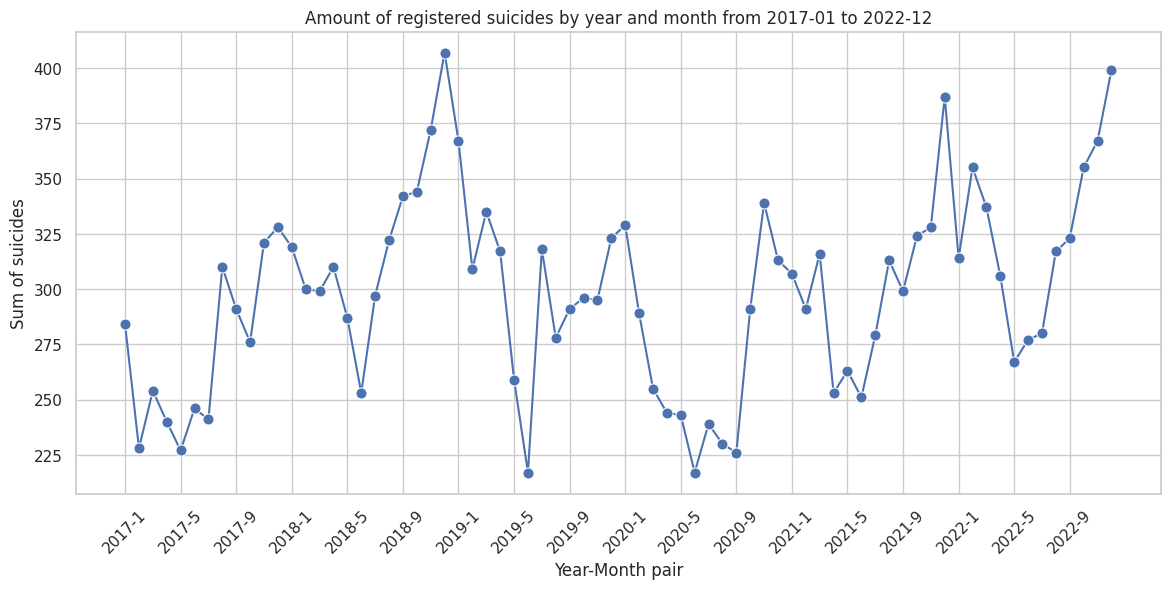

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.lineplot(x="year-month", y='sum_suicides', data=suicides_grouped,  marker='o', markersize=8)

plt.title('Amount of registered suicides by year and month from 2017-01 to 2022-12')
plt.xlabel('Year-Month pair')
plt.ylabel('Sum of suicides')
plt.xticks(rotation=45, ticks=suicides_grouped.index[::4])
plt.show()

It looks kinda cyclical, with some ups and downs over the time, but with really distinguished peaks on `2018-12`, `2021-12` and `2022-12`. For this last one, he don´t know if it continued to increase, since we don´t have enough data.

However, it is a thing to highlight that both of them occurred on December. We can also see that the increasing of them started in `2018-06`, `2021-05 / 2021-06` and `2022-05` respectively, considering it as the previous big bottom in the graph.

What can be this due to?

In relation to the 2018 peak, we can find that there was a [macro devaluation of the Argentine Peso by the Government at that time](https://www.celag.org/historia-reciente-de-las-macrodevaluaciones-y-la-inflacion-asociada-en-argentina/) by orders of the International Monetary Found, since it gave Argentina a loan of $50.000 million dolar on June of the same year.

Related to the 2021 period, it coincides with the [progressive flexibilization of the quarantine restrictions in the country](https://es.wikipedia.org/wiki/Medidas_sanitarias_por_la_pandemia_de_COVID-19_en_Argentina). It had started on March of 2020, we can see that during the first months the number of registered suicides where really low.

The economic activity was also [drastically reduced, increasing the unemployment rate and expansive monetary policy from the State](https://repositorio.cepal.org/server/api/core/bitstreams/58300cdd-252a-4a0f-b7cb-5d5a69e5544e/content). The [poverty rate also increased](https://www.cippec.org/publicacion/impacto-social-del-covid-19-en-argentina-balance-del-primer-semestre-del-2020/), specially in the `18-29` years old sector, the youth that is able to work.

Even if the inflation was constantly increased over the last two governments (for this dataset, Mauricio Macri and Alberto Fernandez ones), [it accelerated during this last one.](https://www.lanacion.com.ar/economia/la-inflacion-acumulada-en-las-ultimas-presidencias-y-el-triste-record-de-fernandez-kirchner-nid13112023/)

This can lead us to think that it may be related with the continous new maximum peaks over the period `2020-2022`, since the max values in `2020-11`, `2021-12` and `2022-12`, each one higher that the previous one, are preced by constantly higher bottom values in the first semester of the quarantine `2020-03 / 2020-09`, `2021-04 / 2021-05 / 2021-06` and `2022-05`.

But his may not be enough to explain the periodical decrease in total suicides.


Let´s see how the evolution was for each range of age.

In [27]:
suicides_grouped_age = suicides.copy()

In [28]:
suicides_grouped_age['year'] = pd.DatetimeIndex(suicides_grouped_age['fecha']).year
suicides_grouped_age['month'] = pd.DatetimeIndex(suicides_grouped_age['fecha']).month

In [29]:
suicides_grouped_age.drop(columns=["fecha"], inplace=True)

In [30]:
suicides_grouped_age = suicides_grouped_age.groupby(by=["year", "month", "suicida_rango_edad"])

In [31]:
suicides_grouped_age = suicides_grouped_age.size().reset_index(name='sum_suicides')

In [32]:
suicides_grouped_age["year-month"] = suicides_grouped_age["year"].astype(str) + "-" + suicides_grouped_age["month"].astype(str)

In [33]:
suicides_grouped_age

,year,month,suicida_rango_edad,sum_suicides,year-month
0,2017,1,10-14,4,2017-1
1,2017,1,15-19,38,2017-1
2,2017,1,20-24,38,2017-1
3,2017,1,25-29,27,2017-1
4,2017,1,30-34,32,2017-1
...,...,...,...,...,...
1286,2022,12,75-79,12,2022-12
1287,2022,12,80-84,9,2022-12
1288,2022,12,85-89,1,2022-12
1289,2022,12,90 y más,3,2022-12


In [34]:
suicides_grouped_age["suicida_rango_edad"].unique()

array(['10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44',
       '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79',
       '80-84', '85-89', '90 y más', 'Sin determinar', '5-9'],
      dtype=object)

There are quite a lot of values, so we will do multiple plots

In [35]:
suicides_grouped_age = suicides_grouped_age.groupby(by="suicida_rango_edad")

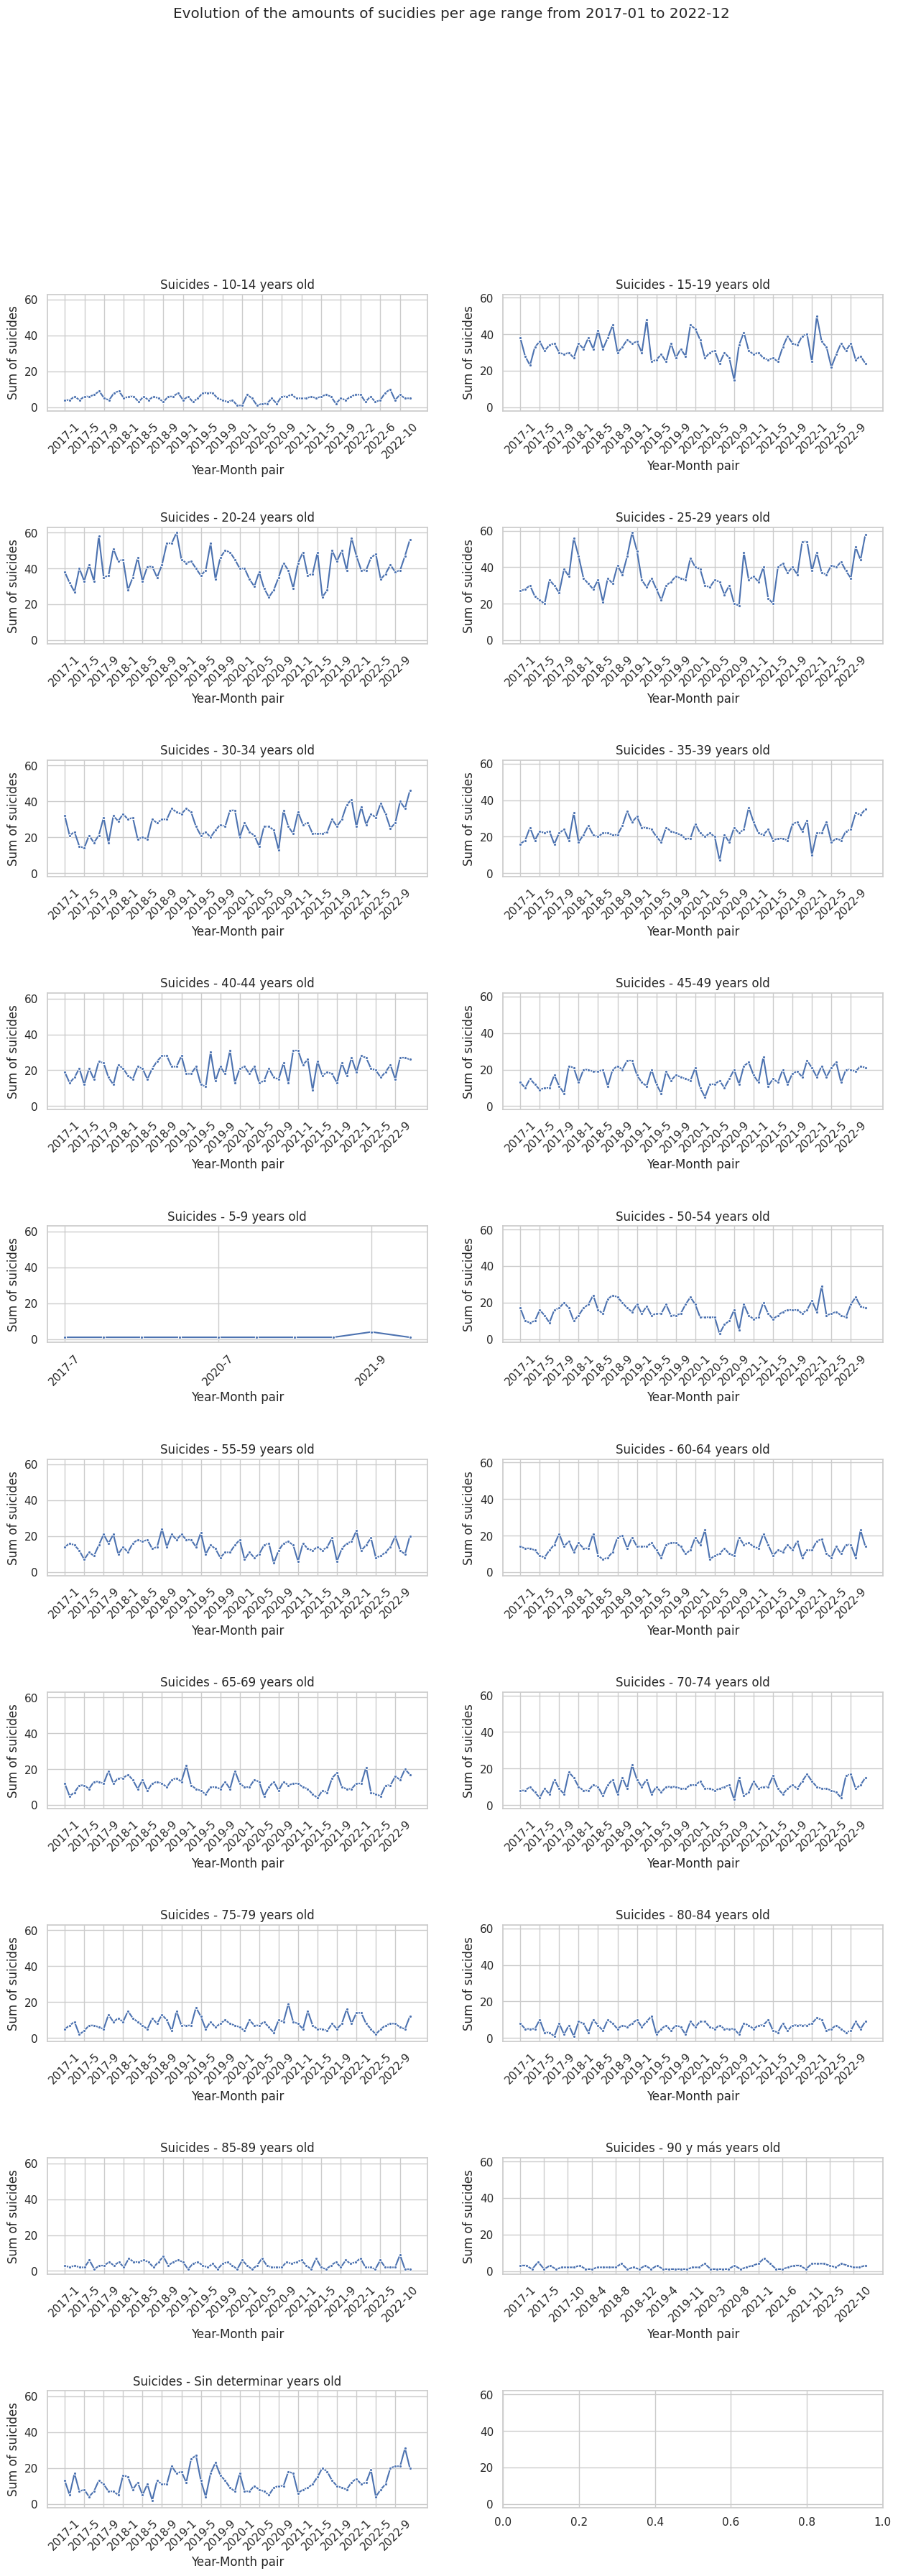

In [36]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(15, 40), sharex='none', sharey='col',
                       gridspec_kw={'hspace': 1, 'wspace': 0.2})

ax = ax.flatten()
i = 0

for age, entries in suicides_grouped_age:
  sns.lineplot(x="year-month", y='sum_suicides', hue="suicida_rango_edad", data=entries,  marker='o', markersize=3, ax=ax[i], legend=False)
  ax[i].set_title(f'Suicides - {age} years old')
  ax[i].set_xlabel('Year-Month pair')
  ax[i].set_ylabel('Sum of suicides')

  ticks_to_show = entries['year-month'].unique()[::4]
  ax[i].set_xticks(ticks_to_show)
  ax[i].tick_params(axis='x', rotation=45)

  i += 1

fig.suptitle('Evolution of the amounts of sucidies per age range from 2017-01 to 2022-12')
plt.show()

Over the time, for each group, the tendency is relatively stable, but the range of total suicides isn´t the same for each group.

Let´s take a look to their distribution.



In [37]:
boxplot_data = suicides.copy()

In [38]:
boxplot_data

,id_hecho,id_departamento_indec,fecha,hora,lugar,modalidad,origen_registro,suicida_sexo,suicida_rango_edad,suicida_identidad_genero
0,8569,78021,2017-01-01,19:00:00,Vía pública,Ahorcamiento,Denuncia particular,Masculino,15-19,Sin determinar
1,8705,58035,2017-01-31,17:30:00,Otro Lugar ( Especificar ),Arma de fuego,Intervención policial,Masculino,20-24,Sin determinar
2,8706,58035,2017-01-31,22:40:00,Domicilio particular,Ahorcamiento,Intervención policial,Masculino,20-24,Sin determinar
3,8707,58035,2017-01-29,20:30:00,Domicilio particular,Ahorcamiento,Intervención policial,Masculino,20-24,Sin determinar
4,8708,58049,2017-01-02,14:25:00,Domicilio particular,Ahorcamiento,Intervención policial,Masculino,45-49,Sin determinar
...,...,...,...,...,...,...,...,...,...,...
21421,38831,14021,2022-08-28,11:11:11,Domicilio particular,Ahorcamiento,Intervención policial,Femenino,15-19,Mujer
21422,37640,18049,2022-07-09,07:30:00,Cárcel o comisaría,Ahorcamiento,Intervención policial,Masculino,30-34,Varón
21423,37642,18070,2022-09-11,05:00:00,Domicilio particular,Sin determinar,Intervención policial,Masculino,50-54,Varón
21424,37643,18070,2022-09-27,06:45:00,Domicilio particular,Ahorcamiento,Intervención policial,Masculino,15-19,Varón


In [39]:
boxplot_data['year'] = pd.DatetimeIndex(boxplot_data['fecha']).year
boxplot_data['month'] = pd.DatetimeIndex(boxplot_data['fecha']).month

In [40]:
boxplot_data.drop(columns=["fecha"], inplace=True)

In [41]:
boxplot_data = boxplot_data.groupby(by=["suicida_rango_edad", "year","month"])

In [42]:
boxplot_data = boxplot_data.size().reset_index(name='sum_suicides')

In [43]:
median_order = boxplot_data.groupby("suicida_rango_edad")["sum_suicides"].median().sort_values(ascending=False).index

In [44]:
age_range_order = ['5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',  '40-44', '45-49', '50-54',
                   '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90 y más', 'Sin determinar']

In [45]:
boxplot_data

,suicida_rango_edad,year,month,sum_suicides
0,10-14,2017,1,4
1,10-14,2017,2,4
2,10-14,2017,3,6
3,10-14,2017,4,4
4,10-14,2017,5,6
...,...,...,...,...
1286,Sin determinar,2022,8,20
1287,Sin determinar,2022,9,21
1288,Sin determinar,2022,10,21
1289,Sin determinar,2022,11,31


<ipython-input-46-2c318e0397b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sum_suicides", y="suicida_rango_edad", data=boxplot_data, orient="h", palette="Set2", order=age_range_order)


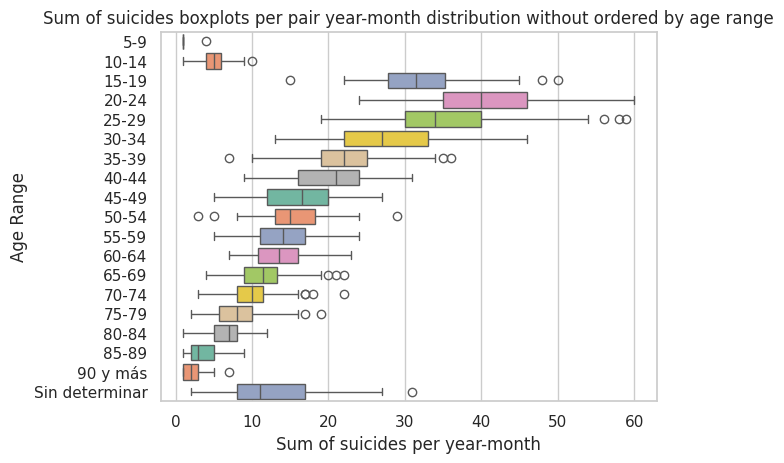

In [46]:
plt.figure()
sns.boxplot(x="sum_suicides", y="suicida_rango_edad", data=boxplot_data, orient="h", palette="Set2", order=age_range_order)
plt.ylabel("Age Range")
plt.xlabel("Sum of suicides per year-month")
plt.title("Sum of suicides boxplots per pair year-month distribution without ordered by age range")
plt.show()

<ipython-input-47-b13d637bbdd8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sum_suicides", y="suicida_rango_edad", data=boxplot_data, orient="h", palette="Set2", order=median_order)


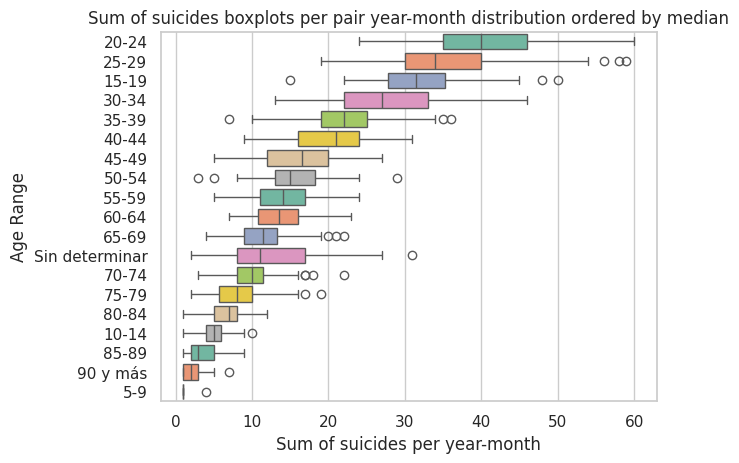

In [47]:
plt.figure()
sns.boxplot(x="sum_suicides", y="suicida_rango_edad", data=boxplot_data, orient="h", palette="Set2", order=median_order)
plt.ylabel("Age Range")
plt.xlabel("Sum of suicides per year-month")
plt.title("Sum of suicides boxplots per pair year-month distribution ordered by median")
plt.show()

The youth are the ones that, by a big difference, commmit more suicide, with a peak at the range of `15-29` years old, with an special focus in the `20-24` years old youth. For more younger people (age < 15), the distribution tends to go to absolutely low values. From 30 years old and so on, it starts to progressively decrease, being smaller and smaller for more older people.

However, we can highlight from the second plot that the distribution of suicides for kids from `10-14` years old is kind of similar to the people of `80-89` monthly.

In [129]:
suicides["suicida_rango_edad"].value_counts(normalize=True)

20-24             0.136983
25-29             0.119154
15-19             0.108140
30-34             0.092224
35-39             0.076076
40-44             0.068048
45-49             0.055260
50-54             0.051573
55-59             0.047699
60-64             0.045599
Sin determinar    0.041352
65-69             0.038785
70-74             0.034211
75-79             0.027630
80-84             0.021096
10-14             0.017269
85-89             0.012041
90 y más          0.006254
5-9               0.000607
Name: suicida_rango_edad, dtype: float64

In [126]:
youth_labels = ["15-19", "20-24", "25-29"]

proportion_youth_suicides = len(suicides[suicides["suicida_rango_edad"].isin(youth_labels)]) / len(suicides)

In [127]:
print(proportion_youth_suicides)

0.3642770465789228


In [48]:
del boxplot_data, age_range_order, median_order, suicides_grouped_age, suicides_grouped

Let's observe the distribution of other variables.

In [49]:
def barplot_per_attribute(attribute, title="", normalize=False):
  plt.figure()
  distribution = suicides[attribute].value_counts(normalize=normalize)
  sns.barplot(y=distribution.index, x=distribution)
  plt.title(title)
  plt.ylabel(attribute)
  plt.xlabel("Frecuency")
  plt.show()

In [50]:
suicides.columns

Index(['id_hecho', 'id_departamento_indec', 'fecha', 'hora', 'lugar',
       'modalidad', 'origen_registro', 'suicida_sexo', 'suicida_rango_edad',
       'suicida_identidad_genero'],
      dtype='object')

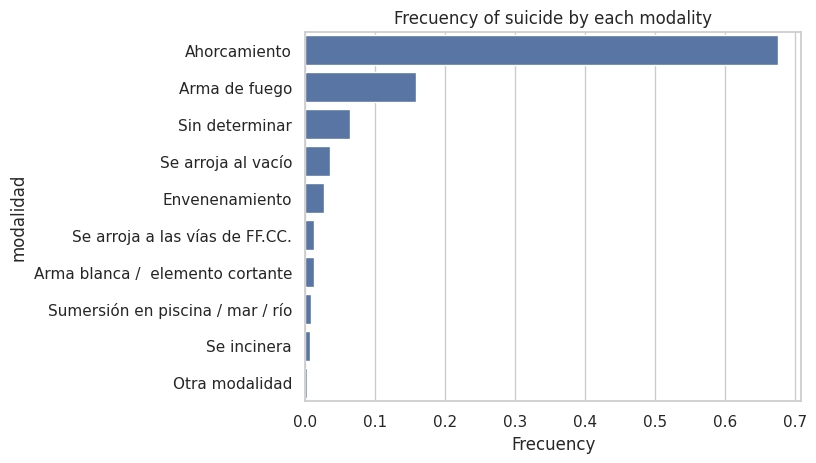

In [51]:
barplot_per_attribute("modalidad", "Frecuency of suicide by each modality", True)

The tendency is clear, up to 70% of the suicides are because of `hanging`, followed by the use of `fire weapons` with approximately 15%. Both of them, sum up to 85% of all the modalities of suicides.

A bit more than 5% of the suicides modalities couldn´t be identified.

A bit less than 5% are because the suicidial `jump off of a height` and even less because of `poison`.

The other ways are even less, tend to `zero`.

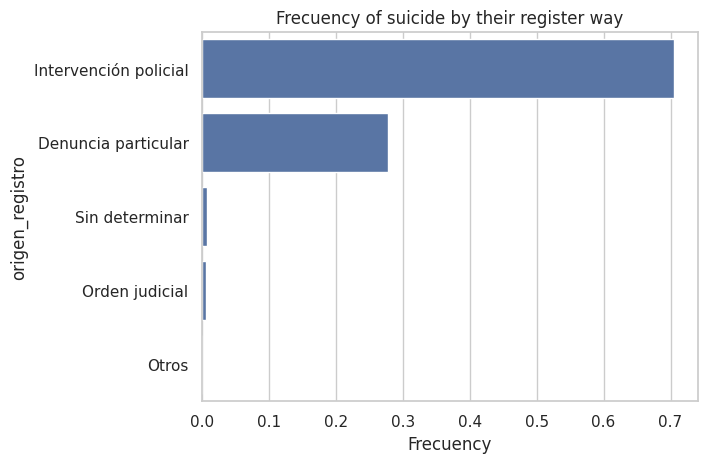

In [52]:
barplot_per_attribute("origen_registro", "Frecuency of suicide by their register way", normalize=True)

Again, the tendency is clear.

70% of the suicides are reported by a `police intervention` and almost 30% by some `particular`. They are together almost the 100% of the ways in which the data was registered. The other ways are almost `zero`.

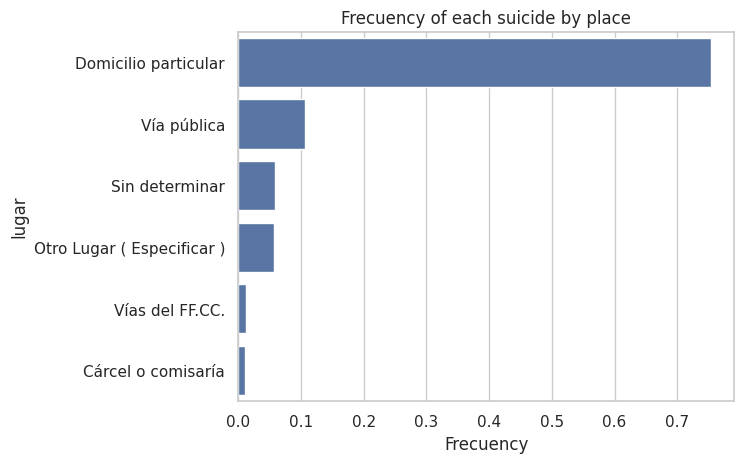

In [53]:
barplot_per_attribute("lugar", "Frecuency of each suicide by place", normalize=True)

Up to 80% of the suicides are done in a `particular domicile` (70%) and the `public road` (10%).

There are something like 5% for each `Sin determinar` and `Otro Lugar`. The others are close to `zero`.

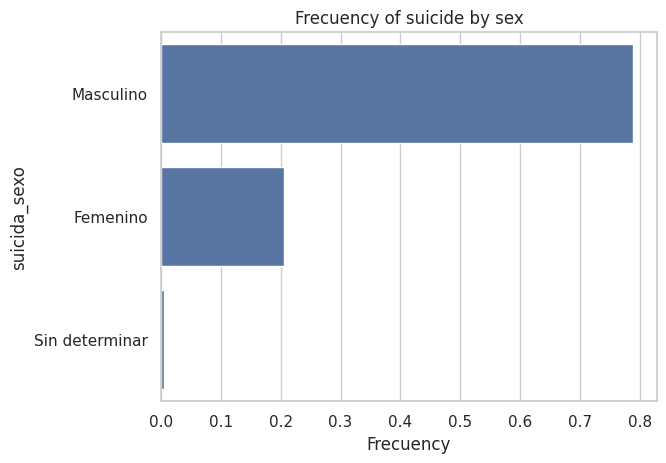

In [54]:
barplot_per_attribute("suicida_sexo", "Frecuency of suicide by sex", normalize=True)

There is an astonishing assimetry here.

Almost 100% of the suicidal's sex could be determinated in the way of `Male` or `Female`, being almost 4 out of 5 suicidal men and the last one a female.

Why can this be happening? Is just a thing of proportion or does suicide develops different in men and women?

We need to see how each variable behaves per sex.

In [61]:
len(suicides)

21426

In [69]:
def barplot_per_attribute_colored(attribute, title="", hue="suicida_sexo", normalize=False):
    plt.figure()

    normalized_data = (suicides.groupby([attribute, hue]).size() / len(suicides)).reset_index(name='proportion')

    normalized_data = normalized_data.sort_values(by='proportion', ascending=False)

    sns.barplot(y=attribute, x='proportion', hue=hue, data=normalized_data)

    plt.title(title)
    plt.ylabel(attribute)
    plt.xlabel("Proportion")
    plt.legend(title="Sex", loc="lower right")
    plt.show()

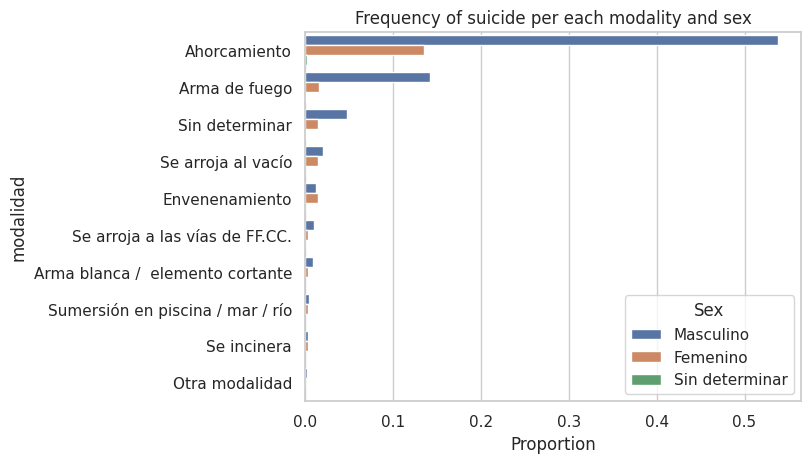

In [108]:
barplot_per_attribute_colored("modalidad", "Frequency of suicide per each modality and sex", hue="suicida_sexo", normalize=True)

There is a clear tendency, in almost every type of suicide, the men are the ones that are the most frequent.

Looking at the barplot, there is only one in which the females have advantage, the suicides by `poison`.

In [110]:
#for each type of attribute, returns the numbers of men that participate of them per 1 women
def proportion_per_attribute_by_sex(attribute):

    normalized_data = (suicides.groupby([attribute, "suicida_sexo"]).size() / len(suicides)).reset_index(name='proportion')

    normalized_data = normalized_data.sort_values(by='proportion', ascending=False)

    normalized_data = normalized_data.groupby(by=[attribute])

    ratios = {}

    for group, entries in normalized_data:
      try:
          ratio_men = entries[entries["suicida_sexo"] == "Masculino"]["proportion"].iloc[0]
          ratio_women = entries[entries["suicida_sexo"] == "Femenino"]["proportion"].iloc[0]
          ratio_men_per_women = ratio_men/ratio_women

          ratios[group] = ratio_men_per_women
      except:
        ratios[group] = 0


    return ratios



In [111]:
modalities_suicides_men_per_women = proportion_per_attribute_by_sex("modalidad")

<ipython-input-110-48641de7c425>:12: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group, entries in normalized_data:


In [112]:
def barplot_men_per_women_ratio_per_attribute(ratio, attribute):
  plt.figure(figsize=(10, 6))
  barplot = sns.barplot(x=list(ratio.values()), y=list(ratio.keys()), orient="h")

  for index, value in enumerate(ratio.values()):
      barplot.text(value, index, f"{value:.2f}", ha='left', va='center', color='black', fontsize=8)

  plt.title(f'Men per Women Ratio for Different {attribute} of Suicide')
  plt.xlabel('Men per Women Ratio')
  plt.ylabel(f'{attribute} of Suicide')
  plt.show()

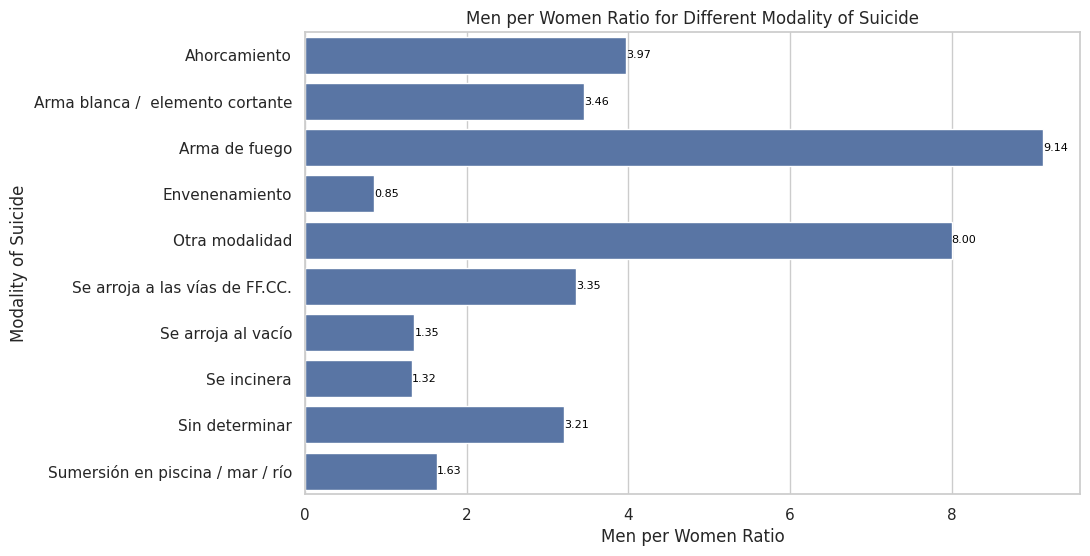

In [113]:
barplot_men_per_women_ratio_per_attribute(modalities_suicides_men_per_women, "Modality")

There is only one modality in which women kill themselves more than men, and it is by using `poison` with a coefficient of `0.85`.

In every other way, there is a really significant predomination of men. Giving our focus to the ways of suicide that were the most populated, by:

- `Ahorcamiento / Hanging` almost 4 men per 1 woman kill themselves.
- `Arma de Fuego / Fire Weapong` more than 9 men per 1 woman commit suicide.
- `Otra modalidad / Other modality` 8 men self-murder.

We should continue to see if this happens with other attributes.

In [114]:
suicides.columns

Index(['id_hecho', 'id_departamento_indec', 'fecha', 'hora', 'lugar',
       'modalidad', 'origen_registro', 'suicida_sexo', 'suicida_rango_edad',
       'suicida_identidad_genero'],
      dtype='object')

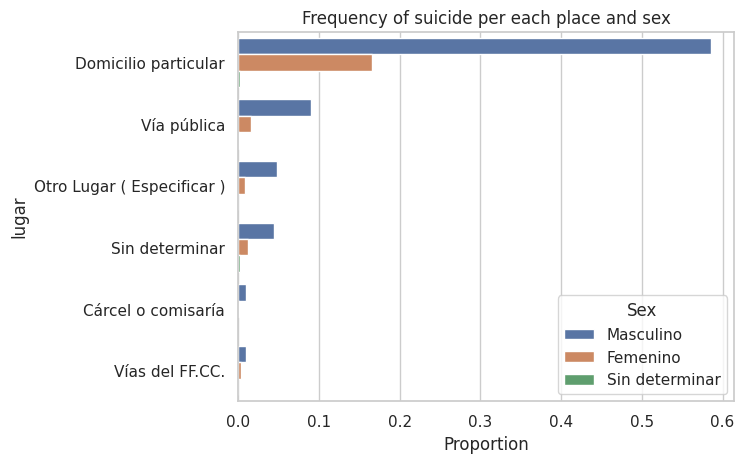

In [115]:
barplot_per_attribute_colored(attribute="lugar", title="Frequency of suicide per each place and sex", hue="suicida_sexo", normalize=False)

Nothin that should surprise us, the porportion of `men` per `women` indicate that the first ones commit suicide more often. Let´s quantify their relation like we did before.

In [116]:
places_suicides_men_per_women = proportion_per_attribute_by_sex("lugar")

<ipython-input-110-48641de7c425>:12: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group, entries in normalized_data:


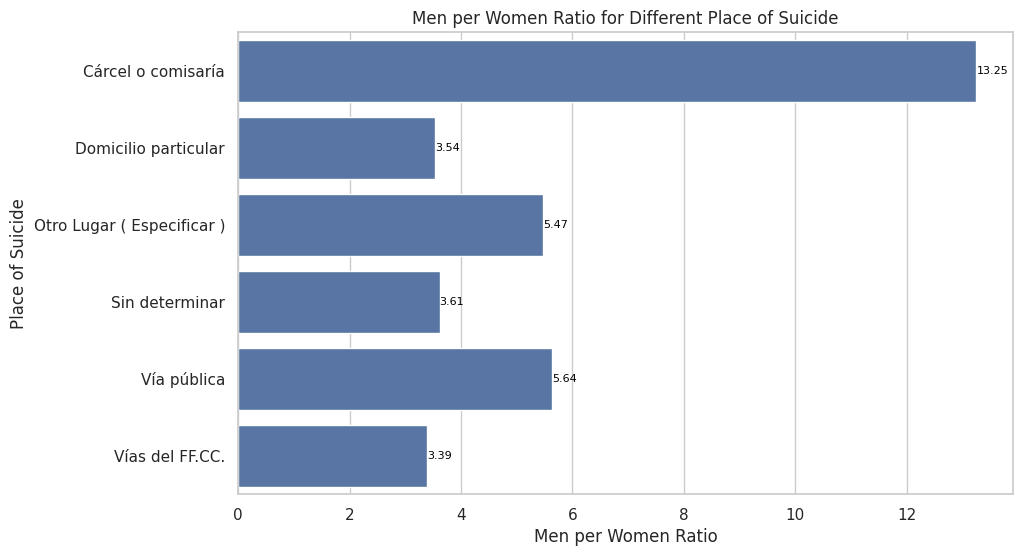

In [117]:
barplot_men_per_women_ratio_per_attribute(places_suicides_men_per_women, "Place")

Here the proportios are more exaggerated than before: In most of them `3-5` men kill themselves per women that does it. However in prision this ratio explodes to more than `13` points

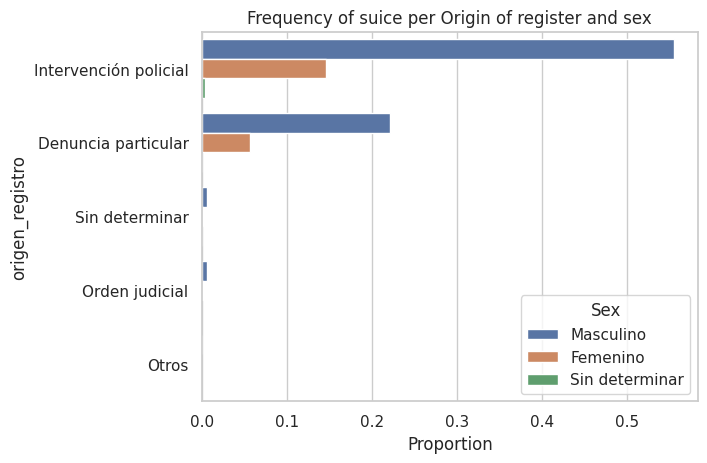

In [104]:
barplot_per_attribute_colored(attribute="origen_registro", title="Frequency of suice per Origin of register and sex",hue="suicida_sexo", normalize=True)

The proportions looks like match up with the general 4 per 1  - men per women ratio.



In [118]:
origin_register_suicides_men_per_women = proportion_per_attribute_by_sex("origen_registro")

<ipython-input-110-48641de7c425>:12: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group, entries in normalized_data:


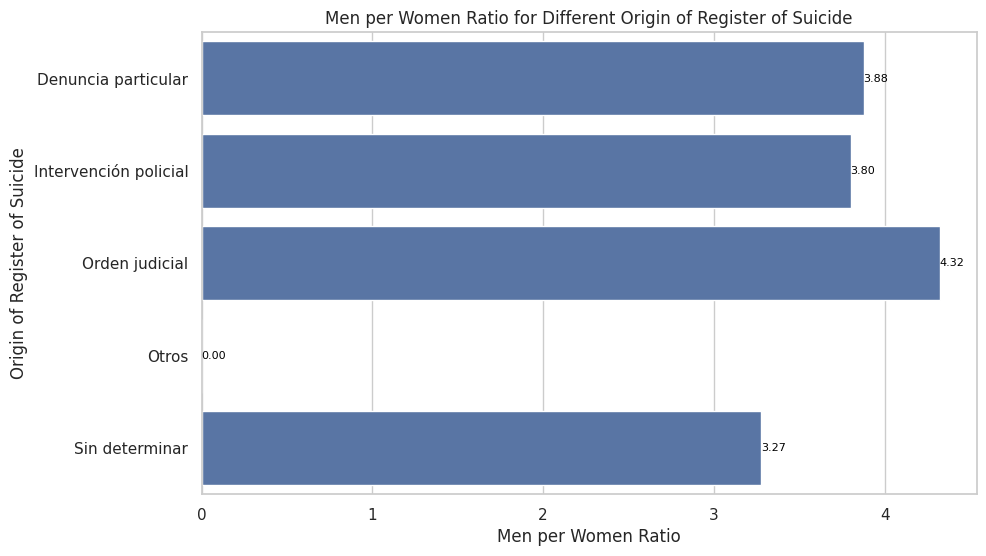

In [119]:
barplot_men_per_women_ratio_per_attribute(ratio=origin_register_suicides_men_per_women, attribute="Origin of Register")

The proportions are in that range of `3 to 4` with an exception for `Others`, probably because there weren´t register for men or women.

Recapitulating, so far we have seen that the evolution of the amount of monthly suicides since `2017-01` to `2022-12` looks like it follows some kind of cyclical behavior.

As it tends to be in a range of `200-300` register per month range most of the time, there were three occurrencies in which it exploded up to `400`, in December of `2018`, `2021` and `2022`, impulses that started approximately six months before those peaks: `2020-03 / 2020-09`, `2021-04 / 2021-05 / 2021-06` and `2022-05`. We highlighted that, in an economical and political view of Argentina, those events could be related to the devaluation of the Peso because of the external debt, the abandon of the quaratine and the acceleration of the inflation rate that followed those events which carried with them an increase in poverty, unenmployment and reduction of the economical activity of the country.

We wanted to see if the suicide rates over time might be correlated with the age range of the suicidals, since we observed using some sources that some of the consequences of the crisis impacted more in the youth.

We saw that all of the total suicide register per age range moved in a well defined range over the time, so it we concluded that the Argentine crisis may not be a crucial factors in them. However, even if all of them moved in a well defined range, this one was different for each age.

The youth were by difference that kill themselves mores, with a clearly cluster peak around the `15-29` years range, holding up to `36%` of the total suicides with a maximum in the `20-24` one. For younger people, the amount of suicides was really low. For older people, it progressively decreased as they aged.

Then, we continued exploring the distribution of the different variables that we got, and we saw that

- For `Modality of Suicide`: `Ahorcamiento / Hanging` was the cause of up to `70%` of the suicides, with `Arma de Fuego / Fire Weapong` being the second one with something proximate to `15%`. They were, by far the most frequent causes.

- For `Place of Suicide`: `Domicilio Particular / Particular Domicile` and `Vía Pública / Public road` were the most populated with a `75%` cut the first and `10%` the second.

- For `Origin of Register`: `Intervencion Policial / Police Intervention` and `Particular Complaint` were the most frequent, with a `70%` and almost `30%` proportion respectively.

- For `Suicidal's Sex`: practically there was a relation of 4 men per each woman that commited suicide.

We asked ourselves why this last assimetry was happening, and then we proceed to explore if it was the case that suicide behaves different from men to women as a social phenomena.

Using a coefficient ratio of "men that commited suicide per each woman" we observed if it was `4` or something close to that in each case.

That wasn´t the same for every attribute and every value, we discovered that:

- Women commited more suicide by `poision` than men.
- The coefficient for suicide by the use of `Fire Weapons` was `9.14`.
- The ratios for the amount of men that suicide in `Prision/Jail` was `13.25`, really extreme value.

For other attributes, the ratio was around `3-5` or something a bit higher than `1` for the ways of suicide, with exception of `Other modalities` which had `8.00`.

But yet, we didn´t see anything about an static distribution of the time in which those suicides occurred. We saw the monthly evolution over the time, but is there any relation with the months isolated themselves? What about the hours?

In [130]:
suicides_per_month = suicides.copy()

In [131]:
suicides_per_month["month"] = suicides_per_month["fecha"].dt.month

In [132]:
suicides_per_month = suicides_per_month.groupby(by=["month"])

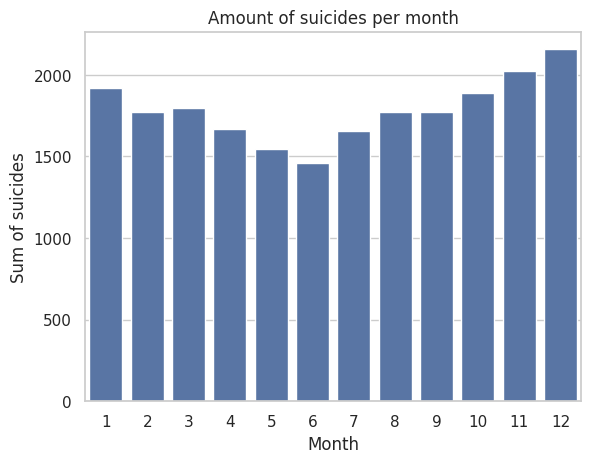

In [137]:
plt.figure()
sns.barplot(suicides_per_month.size())
plt.title("Amount of suicides per month")
plt.ylabel("Sum of suicides")
plt.xlabel("Month")
plt.show()

The distribution is almost uniform, but with sligthlty higher values on November, December and January. We can highlight that those are the months of increase in the hottest of weather in Argentina, it is summer.

There is a clearly lower bottom in June.

In [231]:
suicides_per_hour = suicides.copy()

In [232]:
suicides_per_hour = suicides_per_hour["hora"].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second) #parse to seconds

In [233]:
suicides_per_hour

0        68400
1        63000
2        81600
3        73800
4        51900
         ...  
21421    40271
21422    27000
21423    18000
21424    24300
21425    31500
Name: hora, Length: 21426, dtype: int64

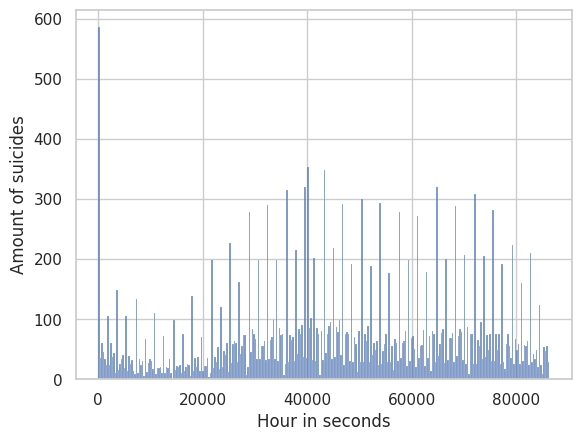

In [243]:
plt.figure()
sns.histplot(suicides_per_hour, bins=300)
plt.xlabel("Hour in seconds")
plt.ylabel("Amount of suicides")
plt.show()

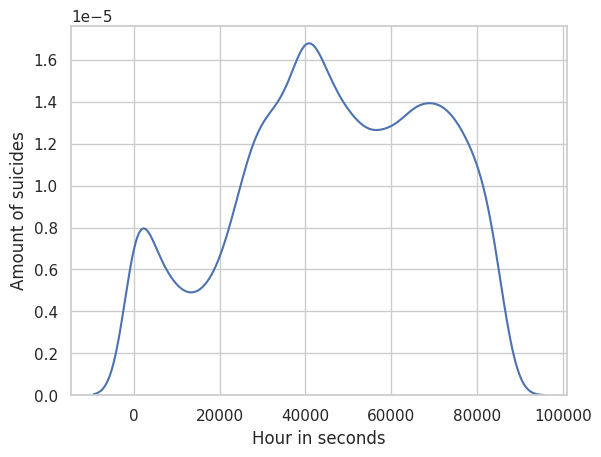

In [244]:
plt.figure()
sns.kdeplot(suicides_per_hour)
plt.xlabel("Hour in seconds")
plt.ylabel("Amount of suicides")
plt.show()

Parsing the hours to seconds, we can see in the histogram that is a clear tendency for values close to `zero` (00:00:00), with some specific peaks along all the day.

The KDE looks even more interesting, since it gives us a look to what it seems like a trimodal distribution. There are three range of hours with a clearly predisposition for suicide. Taking a look back to the histogram it seems like that can be somehow accurate.

In [247]:
def seconds_to_hours(seconds):
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    residual_seconds = seconds % 60
    return f"{int(hours):02d}:{int(minutes):02d}:{int(residual_seconds):02d}"

In [248]:
seconds_to_hours(40000)

'11:06:40'

In [250]:
seconds_to_hours(70000)

'19:26:40'

So, the three look like clusters are around `00:00:00`, `11:00:00` and `19:30:00`

In [259]:
suicides_per_hour = suicides.copy()["hora"]

In [260]:
suicides_per_hour = suicides_per_hour.value_counts().sort_values(ascending=False)

In [270]:
suicides_per_hour.head(30).sort_index(ascending=True)

00:00:00    506
06:00:00    187
07:00:00    218
08:00:00    266
08:30:00    187
09:00:00    282
09:30:00    190
10:00:00    299
10:30:00    203
11:00:00    315
11:11:11    304
11:30:00    189
12:00:00    337
12:30:00    202
13:00:00    282
14:00:00    280
15:00:00    287
16:00:00    273
16:30:00    188
17:00:00    260
18:00:00    309
18:30:00    191
19:00:00    279
19:30:00    196
20:00:00    296
20:30:00    192
21:00:00    265
21:30:00    182
22:00:00    210
23:00:00    202
Name: hora, dtype: int64

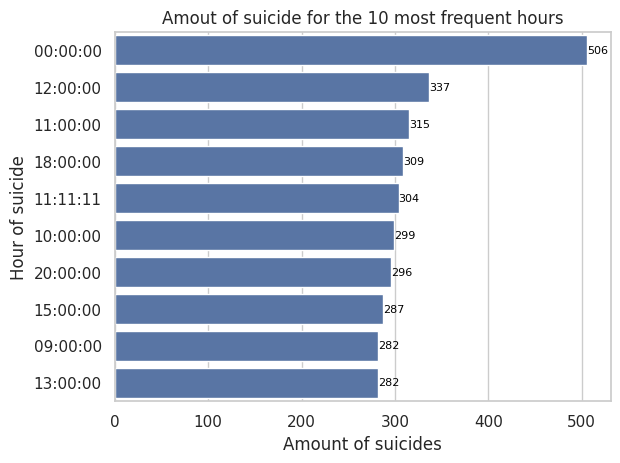

In [269]:
plt.figure()
barplot = sns.barplot(y=suicides_per_hour[:10].index, x=suicides_per_hour[:10].values)
for index, value in enumerate(suicides_per_hour[:10]):
      barplot.text(value, index, f"{value}", ha='left', va='center', color='black', fontsize=8)
plt.xlabel("Amount of suicides")
plt.ylabel("Hour of suicides")
plt.title("Amout of suicides for the 10 most frequent hours")
plt.show()

We have more than 20000 registers of suicide, and the most frequent hour of them is `00:00:00` with 506 cases. The second most frequent one is `12:00:00` with 337 cases. From this and next, the following ones decrease really slowly.

Looking at the top ten most frequent hours, we can see that most of them have o'clock values, with the exception of fifth one, which is `11:11:11` hs.

But even looking at the top 30 sorted by hour, which interesting gives us register from `00:00:00` to `23:00:00` with an step of `30` minutes or an hour, the only one that really highlights it's the midnight one.

As we did before with the other attributes, we can see if there is any difference based on the sex of the suicidal

In [290]:
suicides_per_hour_and_sex = suicides.copy()

In [292]:
suicides_per_hour_and_sex = suicides_per_hour_and_sex[["hora", "suicida_sexo"]]

In [293]:
suicides_per_hour_and_sex["hora"] = suicides_per_hour_and_sex["hora"].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

In [296]:
suicides_per_hour_and_sex

,hora,suicida_sexo
0,68400,Masculino
1,63000,Masculino
2,81600,Masculino
3,73800,Masculino
4,51900,Masculino
...,...,...
21421,40271,Femenino
21422,27000,Masculino
21423,18000,Masculino
21424,24300,Masculino


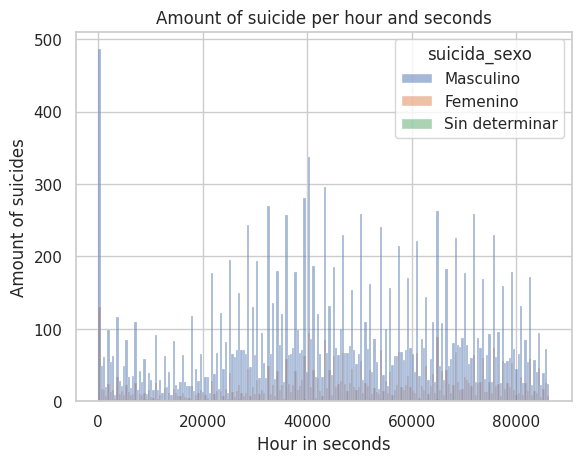

In [299]:
plt.figure()
sns.histplot(data=suicides_per_hour_and_sex, x ="hora", bins=200, hue="suicida_sexo")
plt.xlabel("Hour in seconds")
plt.ylabel("Amount of suicides")
plt.title("Amount of suicide per hour and seconds")
plt.show()

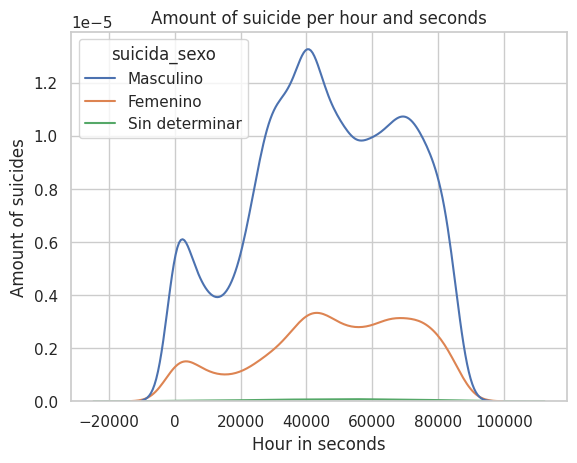

In [301]:
plt.figure()
sns.kdeplot(data=suicides_per_hour_and_sex, x ="hora",hue="suicida_sexo")
plt.xlabel("Hour in seconds")
plt.ylabel("Amount of suicides")
plt.title("Amount of suicide per hour and seconds")
plt.show()

The distribution is the same for both men and women, a bit less differenciated for these last ones.

There is one last thing that we may explore in this dataset in an isolated way: the gender identity perspective of the suicides.

In [303]:
suicides_with_gender_identity = suicides[suicides["suicida_identidad_genero"] != "Sin determinar"].copy()

In [304]:
suicides_with_gender_identity

,id_hecho,id_departamento_indec,fecha,hora,lugar,modalidad,origen_registro,suicida_sexo,suicida_rango_edad,suicida_identidad_genero
12053,25245,38021,2021-01-01,22:40:00,Otro Lugar ( Especificar ),Se arroja al vacío,Intervención policial,Masculino,60-64,Varón
12054,25246,38021,2021-01-01,19:40:00,Domicilio particular,Ahorcamiento,Intervención policial,Femenino,30-34,Mujer
12055,25247,38021,2021-01-25,17:30:00,Otro Lugar ( Especificar ),Ahorcamiento,Intervención policial,Masculino,35-39,Varón
12056,25248,38042,2021-01-10,23:25:00,Domicilio particular,Ahorcamiento,Intervención policial,Masculino,45-49,Varón
12057,25252,30008,2021-02-24,10:40:00,Domicilio particular,Ahorcamiento,Intervención policial,Femenino,40-44,Mujer
...,...,...,...,...,...,...,...,...,...,...
21421,38831,14021,2022-08-28,11:11:11,Domicilio particular,Ahorcamiento,Intervención policial,Femenino,15-19,Mujer
21422,37640,18049,2022-07-09,07:30:00,Cárcel o comisaría,Ahorcamiento,Intervención policial,Masculino,30-34,Varón
21423,37642,18070,2022-09-11,05:00:00,Domicilio particular,Sin determinar,Intervención policial,Masculino,50-54,Varón
21424,37643,18070,2022-09-27,06:45:00,Domicilio particular,Ahorcamiento,Intervención policial,Masculino,15-19,Varón


In [306]:
suicides_with_gender_identity["suicida_identidad_genero"].value_counts()

Varón                   5206
Mujer                   1489
Mujer trans/travesti       4
Varón trans                1
Name: suicida_identidad_genero, dtype: int64

Most of the values corresponds to men and women. Let´s see which of them coincide with the `Masculino / Femenino` value corresponding value.

In [307]:
coincide_gender_sex_filter = (suicides["suicida_identidad_genero"] == "Varón") & (suicides["suicida_sexo"] == "Masculino") | (suicides["suicida_identidad_genero"] == "Mujer") & (suicides["suicida_sexo"] == "Femenino")

In [308]:
suicides_with_gender_identity["coincides_gender_sex"] = coincide_gender_sex_filter

In [309]:
suicides_with_gender_identity["coincides_gender_sex"].value_counts()

True     6695
False       5
Name: coincides_gender_sex, dtype: int64

There are only five cases in which these values don´t coincide.

We will not estimate that as enough data to do a deeper analysis on this topic.

In [312]:
del suicides_with_gender_identity, coincide_gender_sex_filter, suicides_per_hour_and_sex, suicides_per_hour, suicides_per_month, modalities_suicides_men_per_women, origin_register_suicides_men_per_women, places_suicides_men_per_women, youth_labels, proportion_youth_suicides, suicides_grouped_age, suicides_grouped, median_order, youth_labels

NameError: name 'suicides_with_gender_identity' is not defined

## Suicide - Mean Wage - Criminal stats - relational Analysis